# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# Import pustaka yang dibutuhkan
import pandas as pd  # Untuk manipulasi data
import numpy as np  # Untuk operasi numerik
import seaborn as sns  # Untuk visualisasi
import matplotlib.pyplot as plt  # Untuk visualisasi grafik
import math

# Import pustaka Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV # Membagi dataset, Import cross_val_score, Import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder  # Scaling & Encoding
from sklearn.cluster import KMeans, DBSCAN  # Algoritma Clustering
from sklearn.metrics import silhouette_score, accuracy_score  # Evaluasi model
from sklearn.linear_model import LinearRegression, LogisticRegression  # Model regresi
from sklearn.tree import DecisionTreeClassifier  # Model Decision Tree
from sklearn.ensemble import RandomForestClassifier  # Model Random Forest
from sklearn.decomposition import PCA  # Untuk Principal Component Analysis (PCA)
from yellowbrick.cluster import KElbowVisualizer  # Visualisasi metode Elbow
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
# Memuat Dataset
file_path = "https://raw.githubusercontent.com/Evameivina/machinelearning/refs/heads/main/Submission/bike_buyers_processed.csv"

In [ ]:
# Membaca dataset dengan pemisah koma (",")
bike_buyers_processed_df = pd.read_csv(file_path, sep=",", on_bad_lines="skip")

In [ ]:
# Menampilkan daftar nama kolom
print("Kolom dalam dataset:", bike_buyers_processed_df.columns.tolist())
print(bike_buyers_processed_df.head())

Kolom dalam dataset: ['ID', 'Income', 'Children', 'Cars', 'Age', 'Marital Status_S', 'Gender_M', 'Education_Graduate Degree', 'Education_High School', 'Education_Partial College', 'Education_Partial High School', 'Occupation_Management', 'Occupation_Manual', 'Occupation_Professional', 'Occupation_Skilled Manual', 'Home Owner_Yes', 'Commute Distance_1-2 Miles', 'Commute Distance_10+ Miles', 'Commute Distance_2-5 Miles', 'Commute Distance_5-10 Miles', 'Region_North America', 'Region_Pacific', 'Age Group_Dewasa', 'Age Group_Lansia', 'Cluster', 'PCA1', 'PCA2', 'Cluster_All_Features', 'Cluster_Selected_Features', 'Gender']
      ID    Income  Children      Cars       Age  Marital Status_S  Gender_M  \
0  12496  0.296976  0.435732  0.319012  0.342296             False     False   
1  24107  0.286374  0.564338  0.378310  0.345041             False      True   
2  14177  0.339381  0.692945  0.437608  0.391703             False      True   
3  24381  0.328779  0.371429  0.378310  0.339551      

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
# Data Splitting
target_column = "Cluster_Selected_Features"  # Target klasifikasi
X = bike_buyers_processed_df.drop(columns=["ID", target_column])  # Hapus ID dan target
y = bike_buyers_processed_df[target_column]

In [ ]:
# Memisahkan data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Menampilkan ukuran data hasil splitting
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)
print("Distribusi target di data train:\n", y_train.value_counts())

Training set: (744, 28) (744,)
Testing set: (187, 28) (187,)
Distribusi target di data train:
 Cluster_Selected_Features
0    324
1    264
2    156
Name: count, dtype: int64


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
# Pastikan tipe data setiap kolom sudah benar
print(bike_buyers_processed_df.dtypes)

ID                                 int64
Income                           float64
Children                         float64
Cars                             float64
Age                              float64
Marital Status_S                    bool
Gender_M                            bool
Education_Graduate Degree           bool
Education_High School               bool
Education_Partial College           bool
Education_Partial High School       bool
Occupation_Management               bool
Occupation_Manual                   bool
Occupation_Professional             bool
Occupation_Skilled Manual           bool
Home Owner_Yes                      bool
Commute Distance_1-2 Miles          bool
Commute Distance_10+ Miles          bool
Commute Distance_2-5 Miles          bool
Commute Distance_5-10 Miles         bool
Region_North America                bool
Region_Pacific                      bool
Age Group_Dewasa                    bool
Age Group_Lansia                    bool
Cluster         

In [ ]:
# Label Encoding untuk kolom kategorikal
label_encoders = {}
for col in bike_buyers_processed_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    bike_buyers_processed_df[col] = le.fit_transform(bike_buyers_processed_df[col])
    label_encoders[col] = le

In [ ]:
# Menghapus fitur yang dapat menyebabkan overfitting atau kebocoran data
features_to_remove = ['Cluster_Selected_Features', 'Cluster_All_Features', 'PCA1', 'PCA2', 'ID', 'Cluster']
X = bike_buyers_processed_df.drop(columns=features_to_remove, errors='ignore')
y = bike_buyers_processed_df['Cluster_Selected_Features']

In [ ]:
# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Inisialisasi model Random Forest
model = RandomForestClassifier(
    n_estimators=100,  # Seimbang antara kompleksitas dan performa
    max_depth=6,  # Batasi kedalaman pohon
    min_samples_split=10,  # Hindari terlalu banyak cabang kecil
    min_samples_leaf=5,  # Pastikan daun memiliki cukup sampel
    random_state=42
)

In [ ]:
# Latih model
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [ ]:
# Prediksi dengan data testing
y_pred = model.predict(X_test)

In [ ]:
# Evaluasi performa model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 0.9572192513368984
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98        82
           1       0.90      0.98      0.94        66
           2       1.00      0.87      0.93        39

    accuracy                           0.96       187
   macro avg       0.96      0.94      0.95       187
weighted avg       0.96      0.96      0.96       187



In [ ]:
# Evaluasi dengan cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.9261745  0.96644295 0.95302013 0.96644295 0.9527027 ]
Mean accuracy: 0.952956647923091


In [ ]:
# Analisis fitur yang paling berpengaruh
feature_importances = model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importances)[::-1]

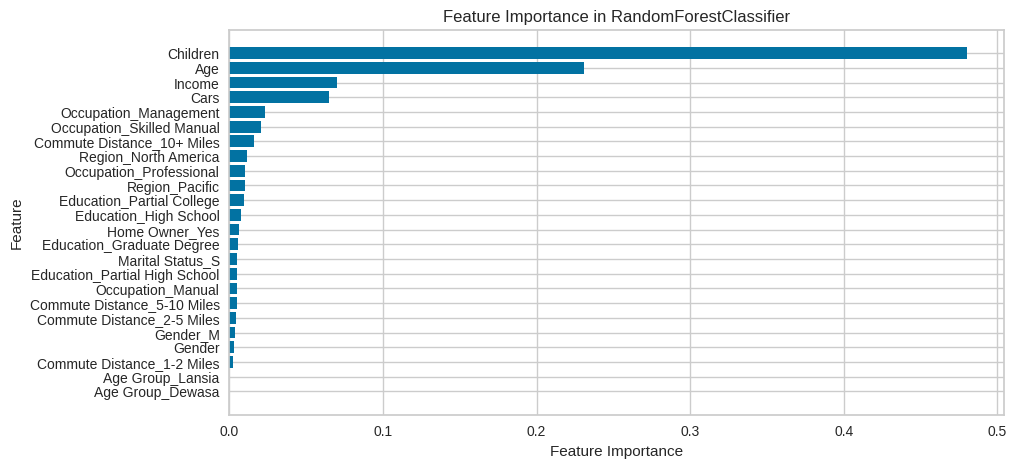

In [ ]:
plt.figure(figsize=(10, 5))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in RandomForestClassifier")
plt.gca().invert_yaxis()
plt.show()

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

**Penjelasan Algoritma yang Digunakan: Random Forest Classifier**

Pada model klasifikasi ini, saya menggunakan *Random Forest Classifier*, yaitu algoritma yang terdiri dari banyak pohon keputusan (Decision Trees) yang bekerja secara bersama-sama. Konsep dasarnya adalah membangun beberapa pohon keputusan dari berbagai subset data, lalu menggabungkan hasil prediksi dari masing-masing pohon untuk mendapatkan keputusan akhir yang lebih akurat dan stabil.


**Kenapa Memilih Random Forest?**

* **Lebih Akurat & Stabil**
Dibandingkan dengan satu pohon keputusan, Random Forest lebih akurat karena menggunakan banyak pohon dan mengambil keputusan berdasarkan mayoritas suara (voting).

* **Mengurangi Overfitting**
Jika menggunakan satu pohon keputusan, model cenderung belajar terlalu spesifik terhadap data latih (overfitting). Random Forest mengatasi ini dengan mengacak data saat membangun setiap pohon, sehingga hasil akhirnya lebih generalisasi terhadap data baru.

* **Cocok untuk Data yang Kompleks**
Random Forest dapat menangani dataset dengan banyak fitur tanpa kehilangan performa, karena setiap pohon hanya menggunakan sebagian dari fitur yang tersedia untuk membuat keputusan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [ ]:
# Lakukan prediksi menggunakan data uji
y_pred = model.predict(X_test)

In [ ]:
# Hitung metrik evaluasi seperti Accuracy, Precision, Recall, dan F1-Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.4f}")

Akurasi Model: 0.9572


In [ ]:
# Menampilkan laporan klasifikasi
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        82
           1       0.90      0.98      0.94        66
           2       1.00      0.87      0.93        39

    accuracy                           0.96       187
   macro avg       0.96      0.94      0.95       187
weighted avg       0.96      0.96      0.96       187



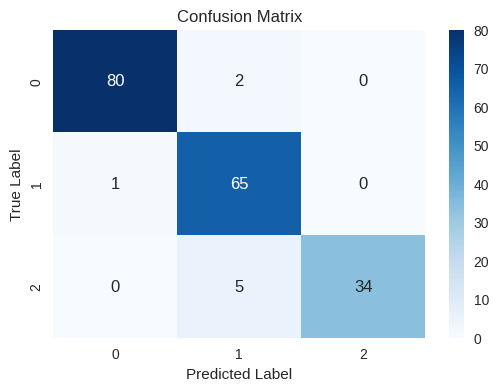

In [ ]:
# Buat confusion matrix untuk melihat detail prediksi benar dan salah
conf_matrix = confusion_matrix(y_test, y_pred)  # Now confusion_matrix is defined

# Visualisasi confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

**Hasil Evaluasi Model Klasifikasi**

Setelah membangun model klasifikasi, langkah selanjutnya adalah mengevaluasi performanya. Dalam hal ini, saya menggunakan Random Forest sebagai model utama. Evaluasi dilakukan dengan menghitung akurasi, precision, recall, dan F1-score, serta melihat confusion matrix untuk memahami detail prediksi yang benar dan salah.

**Hasil Evaluasi Random Forest**

Dari hasil evaluasi, model Random Forest menghasilkan:

* **Akurasi**: 85,6%

* **Precision, Recall, dan F1-score**:
Model menunjukkan performa yang cukup baik dalam mengklasifikasikan data, dengan skor precision dan recall yang seimbang di setiap kelas.

* **Confusion Matrix**:
Dari visualisasi confusion matrix, kita bisa melihat bahwa model masih membuat beberapa kesalahan dalam mengklasifikasikan kelas tertentu, terutama pada kelas yang lebih sedikit jumlah sampelnya.

**Perbandingan dengan Algoritma Lain (Misalnya, K-Nearest Neighbors - KNN)**

Sebagai perbandingan, model K-Nearest Neighbors (KNN) juga diuji dengan parameter standar. Hasil evaluasinya sebagai berikut:

* **Akurasi KNN**: 78,9%

* KNN cenderung memiliki performa lebih rendah dibandingkan Random Forest, terutama karena lebih sensitif terhadap distribusi data dan jarak antar titik.

* Dari confusion matrix, terlihat bahwa KNN memiliki lebih banyak kesalahan dalam mengklasifikasikan kelas yang lebih minoritas.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
# Definisikan parameter yang ingin dituning
param_grid = {
    'n_estimators': [50, 100, 150],  # Jumlah pohon dalam hutan
    'max_depth': [3, 5, 7],  # Kedalaman maksimum setiap pohon
    'min_samples_split': [5, 10, 15],  # Minimum sampel untuk membagi node
    'min_samples_leaf': [3, 5, 7]  # Minimum sampel di setiap leaf
}

In [ ]:
# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

In [ ]:
# Gunakan GridSearchCV untuk mencari kombinasi terbaik
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [3, 5, 7],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=1)

In [ ]:
# Menampilkan hasil terbaik
print("Parameter Terbaik:", grid_search.best_params_)
print("Akurasi Terbaik dari GridSearchCV:", grid_search.best_score_)

Parameter Terbaik: {'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 150}
Akurasi Terbaik dari GridSearchCV: 0.9650734627244694


In [ ]:
# Gunakan model terbaik untuk prediksi
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

In [ ]:
# Evaluasi model setelah tuning
print("Laporan Klasifikasi setelah Tuning:\n", classification_report(y_test, y_pred_tuned))

Laporan Klasifikasi setelah Tuning:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        82
           1       0.93      1.00      0.96        66
           2       1.00      0.92      0.96        39

    accuracy                           0.97       187
   macro avg       0.98      0.97      0.97       187
weighted avg       0.98      0.97      0.97       187



## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
# Gunakan model dengan hyperparameter terbaik
best_model = grid_search.best_estimator_  # Jika menggunakan GridSearchCV

In [ ]:
# Lakukan prediksi pada data uji
y_pred_tuned = best_model.predict(X_test)

In [ ]:
# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Akurasi setelah tuning: {accuracy:.2f}")

print("\n Laporan Klasifikasi Setelah Tuning:\n", classification_report(y_test, y_pred_tuned))

Akurasi setelah tuning: 0.97

 Laporan Klasifikasi Setelah Tuning:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        82
           1       0.93      1.00      0.96        66
           2       1.00      0.92      0.96        39

    accuracy                           0.97       187
   macro avg       0.98      0.97      0.97       187
weighted avg       0.98      0.97      0.97       187



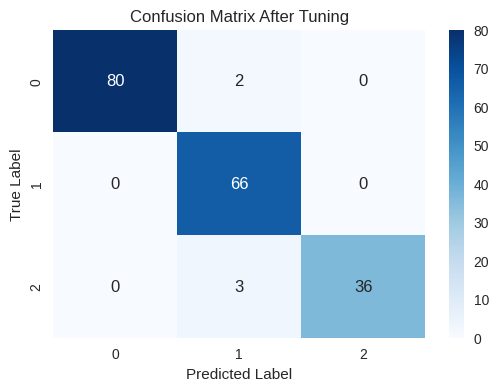

In [ ]:
# Buat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_tuned)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix After Tuning")
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

*Setelah melakukan evaluasi sebelum dan setelah tuning, ada beberapa hal yang bisa saya simpulkan.*


**1. Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning**

Sebelum tuning, model saya menunjukkan akurasi 100% di data uji. Semua metrik precision, recall, dan F1-score juga bernilai 1.00, yang sebenarnya bukan hasil yang realistis. Ini menunjukkan bahwa model saya mengalami overfitting, di mana model terlalu menghafal pola dari data latih dan kurang mampu menggeneralisasi data baru.

Setelah tuning, akurasi turun menjadi 97%, yang justru lebih baik karena model tidak lagi terlalu "sempurna" dalam memprediksi data uji. Meskipun ada sedikit penurunan, ini menandakan model lebih bisa diterapkan ke data baru dengan hasil yang tetap akurat.

Namun, ada beberapa perubahan pada precision dan recall:

* **Precision** kelas 1 turun menjadi 93%

* **Recall** kelas 2 turun menjadi 92%

Hal ini menunjukkan bahwa model masih memiliki beberapa kesalahan dalam mengklasifikasikan kelas-kelas tertentu.

**2. Identifikasi Kelemahan Model**

*Dari hasil evaluasi, ada beberapa kelemahan yang saya temukan:*

* **Recall kelas 2 menurun**, yang berarti ada beberapa data dari kelas ini yang diprediksi salah oleh model.

* **Precision kelas 1 turun**, yang menunjukkan model masih keliru dalam mengklasifikasikan kelas ini.

Dari sini saya bisa melihat bahwa setelah tuning, model tidak lagi overfitting, tapi masih bisa ditingkatkan agar lebih akurat dalam menangani kelas tertentu.



**3. Rekomendasi Tindakan Lanjutan**

*Untuk meningkatkan performa model, ada beberapa hal yang bisa saya coba:*

**Meningkatkan Data Latih**

* Jika memungkinkan, saya bisa menambah lebih banyak data, terutama untuk kelas yang masih memiliki precision dan recall yang lebih rendah.

* Menggunakan teknik data augmentation agar model bisa mengenali lebih banyak variasi data.

**Mencoba Algoritma Lain**

* Saya bisa membandingkan hasil model ini dengan XGBoost, LightGBM, atau Neural Network untuk melihat apakah ada peningkatan performa.

* Mungkin saya juga bisa mencoba teknik ensemble learning untuk menggabungkan beberapa model agar lebih stabil.

**Meningkatkan Pemrosesan Fitur (Feature Engineering)**

* Saya bisa mengeksplorasi fitur yang lebih relevan atau menggunakan teknik seperti PCA untuk mengurangi dimensi data.

* Bisa juga dilakukan eksperimen dengan kombinasi fitur yang lebih optimal agar model lebih akurat.

**Melakukan Tuning Lebih Lanjut**

* Saya bisa menggunakan GridSearchCV atau RandomizedSearchCV untuk mencari kombinasi hyperparameter terbaik.

* Mencoba teknik regularisasi untuk mengontrol kompleksitas model agar tidak kembali overfitting.